# Data Modelling / Polynomial Regression

In this notebook we will generate some random data that can be fitted well with a polynomial regression.
Then, we will use identify_best_model to identify the best polynomial for the given data.

In [185]:
import numpy as np
import pandas as pd
import pandas_bokeh

n_samples = 500 

df = pd.DataFrame(data=np.absolute(np.random.randn(n_samples, 2)), columns=['x1', 'x2'])
df['y'] = 0.78 * df['x1']**5 + 0.123 * df['x1']**3 * df['x2']**2 + 2.89 * df['x1'] * df['x2'] + 0.34 * df['x1'] + np.absolute(np.random.randn(n_samples))

In [186]:
df

,x1,x2,y
0,0.230797,0.364296,1.416122
1,0.308990,0.316256,1.351940
2,0.080623,1.121274,1.166190
3,1.527974,0.455172,10.610431
4,1.157581,0.351147,3.560790
...,...,...,...
495,0.955905,0.265301,1.777540
496,2.449712,0.882229,77.975816
497,1.421072,0.403966,7.973413
498,0.097847,1.158984,1.946905


Check distributions and correlations between data 

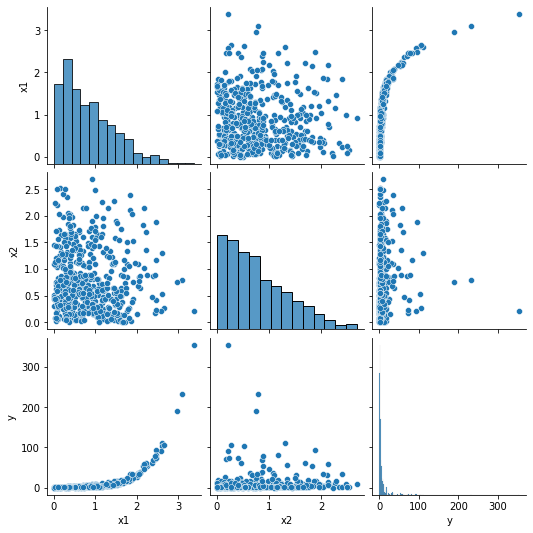

In [187]:
import seaborn as sns

sns.pairplot(data=df)

Use identify_best_model to identify the best polynomial that fits the input data
using the double cross-validation framework.

In [188]:
from ai_toolbox.data_modelling import identify_best_model, PolynomialRegression
from sklearn.model_selection import KFold
from time import time

predictors = ['x1', 'x2']
cv_splitter_outer = KFold(n_splits=5, shuffle=True, random_state=1)
cv_splitter_inner = KFold(n_splits=3, shuffle=True, random_state=1)
grid = {
    PolynomialRegression(): {'degree': list(range(1, 6))},
}
start_time = time()
results = identify_best_model(
    X_data=df[predictors],
    y_data=df.y,
    model_families_parameter_grid=grid,
    cv_inner=cv_splitter_inner,
    cv_outer=cv_splitter_outer,
    scoring=['r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error'],
    compare_with='r2'
)

print("Best model: {}".format(results[0]))
print("Best parameters: {}".format(results[1]))
print("Mean score: {}".format(results[2]))
print("Std score: {}".format(results[3]))
print("Evaluation results: {}".format(results[5]))

print("Time to identify best model: {} seconds.".format(time()-start_time))

Best model: PolynomialRegression(degree=5)
Best parameters: {'degree': 5}
Mean score: 0.9987509035625907
Std score: 0.0009913671662382627
Evaluation results: {'PolynomialRegression()': {'test_r2': {'mean': 0.9987509035625907, 'std': 0.0009913671662382627}, 'test_neg_mean_absolute_error': {'mean': -0.49849840891938246, 'std': 0.022474719948253206}, 'test_neg_root_mean_squared_error': {'mean': -0.6174872534266111, 'std': 0.04872011955607868}}}
Time to identify best model: 1.501131296157837 seconds.


Check the final grid search results

In [189]:
pd.DataFrame.from_dict(results[4])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_degree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002698,0.000125,0.001568,0.000135,1,{'degree': 1},0.573126,0.399712,0.353077,0.441972,0.094674,5
1,0.004734,0.000524,0.002641,0.000072,2,{'degree': 2},0.863143,0.865354,0.801962,0.843486,0.029376,4
2,0.004513,0.000444,0.002704,0.000090,3,{'degree': 3},0.985217,0.985964,0.975964,0.982381,0.004548,3
3,0.003543,0.000568,0.002554,0.000232,4,{'degree': 4},0.999138,0.998995,0.998513,0.998882,0.000268,2
4,0.003811,0.000421,0.002216,0.000459,5,{'degree': 5},0.999366,0.999138,0.999422,0.999309,0.000123,1


In [190]:
best_model = results[0]

Get the coefficients and the intercept of the best polynomial

In [191]:
best_model.coef_

array([-1.57387325e+00, -1.78210782e+00,  1.59583392e+00,  6.95660117e+00,
        2.97316684e+00, -2.23398119e-01, -1.29027115e+00, -5.17938061e+00,
       -2.20422596e+00, -1.71357149e-01,  1.66753728e-01,  1.30245552e-01,
        3.29114363e+00,  6.53084520e-01,  8.21005045e-01,  2.00163208e-04,
        3.32799815e-01, -2.96666424e-01, -5.64847996e-01, -6.47634317e-02])

In [192]:
best_model.intercept_

1.2449787041903928

Plot the results

In [193]:
df['y_pred'] = best_model.predict(df[predictors])
df

,x1,x2,y,y_pred
0,0.230797,0.364296,1.416122,1.051019
1,0.308990,0.316256,1.351940,1.089643
2,0.080623,1.121274,1.166190,1.073532
3,1.527974,0.455172,10.610431,10.076200
4,1.157581,0.351147,3.560790,4.064005
...,...,...,...,...
495,0.955905,0.265301,1.777540,2.435713
496,2.449712,0.882229,77.975816,77.919593
497,1.421072,0.403966,7.973413,7.665556
498,0.097847,1.158984,1.946905,1.139000


In [194]:
df.plot_bokeh.line(
    x=df.index, 
    y=["y", "y_pred"],
    figsize=(1800, 900),
    ylim=(0, 1.2*df.y.max()),
    zooming=True,
    panning=True,
)

Figure(id='2567', ...)